<a href="https://colab.research.google.com/github/li779/16811/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1a: interpolate procedure

In [2]:
import numpy as np
def interpolate(x,y, val):
  table = []
  table.append(y)
  for i in range(1,len(x)):
    table.append([])
    for j in range(len(x)-i):
      table[-1].append((table[i-1][j]-table[i-1][j+1])/(x[j]-x[j+i]))
  res = table[0][0]
  sum = 1
  for i in range(1,len(x)):
    sum *= (val-x[i-1])
    res += table[i][0]*sum
  return res

x = [0,1,-1]
y = [1, 0, 4]
print(interpolate(x,y,1))


0.0


#Problem 1b

In [3]:
x = [0, 0.125, 0.25, 0.5, 0.75, 1]
y = [np.exp(-a**2/2) for a in x]

print("x=1/3: estimate f(x)="+str(interpolate(x,y,1/3)))
print("real value: "+str(np.exp(-(1/3)**2/2)))

x=1/3: estimate f(x)=0.9459570124977975
real value: 0.9459594689067654


#Problem1c

In [4]:
n = 2
x = [2*i*(1/n)-1 for i in range(n+1)]
y = [1/(1+36*a**2) for a in x]
print("x = 0.06, n=2, estimate f(x)="+str(interpolate(x,y,0.06)))
n = 4
x = [2*i*(1/n)-1 for i in range(n+1)]
y = [1/(1+36*a**2) for a in x]
print("x = 0.06, n=4, estimate f(x)="+str(interpolate(x,y,0.06)))
n = 40
x = [2*i*(1/n)-1 for i in range(n+1)]
y = [1/(1+36*a**2) for a in x]
print("x = 0.06, n=40, estimate f(x)="+str(interpolate(x,y,0.06)))
print("actual f(x) at x = 0.06: "+str(1/(1+36*0.06**2)))

x = 0.06, n=2, estimate f(x)=0.9964972972972974
x = 0.06, n=4, estimate f(x)=0.9839329625945948
x = 0.06, n=40, estimate f(x)=0.8852495990481558
actual f(x) at x = 0.06: 0.8852691218130312


# Problem1d

In [5]:
n = [2*i for i in range(1,11)]
n.append(40)
xtest = np.linspace(-1,1,100)
En = []
for i in n:
  x = [2*j*(1/i)-1 for j in range(i+1)]
  y = [1/(1+36*a**2) for a in x]
  En.append(np.amax(np.absolute([1/(1+36*_x**2)-interpolate(x,y,_x) for _x in xtest])))
print(En)

[0.698215835569571, 0.47151343866136586, 0.7068199700852285, 1.2973800521831758, 2.593800299361923, 5.351564572775559, 11.67731267283593, 24.963808140456, 53.72463280236109, 125.14588367239352, 421164.26147718134]


The error estimation increases as adding more data points to the function. In the part c, we find the error decreases at the region near origin. The overall curve of $\frac{1}{1+36x^2}$ decreases from origin to $+x$ and $-x$ direction and the derivative are large close to origin. So using high order polynomial to interpolat the function with equal spacing will tend to minimize the difference in the region close to origin (we observe in part c) but create more wiggles around the edges of interval while approaching higher orders. Therefore, the maximum error increases using higher order polynomial to interpolate the function.

#Q2 <br>
1. Assuming we are using linear interpolation, then the error function is: <br>
$e_1(x)= \frac{f''(\xi)}{2!}(x-x_1)(x-x_2)$ where $[x_1,x_2]$ is the window for x <br>
Now, we want to find upper bound of the error function with a given window. So we calculate upper bound of each component of $e_1(x)$.<br> 
$f''(x) = -\cos(x)$ and $\max_{[-\frac{\pi}{2},\frac{3\pi}{2}]}f''(x) = 1$. <br>
$\max_{[x_1,x_2]} (x-x_1)(x-x_2) = \max_{y \in [0,h]}|y(y-h)|$ where $h = x_2-x_1$. The maximum of $|(y-h)y|$ is $\frac{h^2}{4}$. <br>
Therefore, $|e_1(x)| \leq \frac{1}{2}\frac{h^2}{4} = \frac{h^2}{8}$ and we want $|e_1(x)|< 5\cdot 10^{-7}$. So, the window size is $h = 0.002$ and we need 3142 entries for the table. <br>
2. Assuming we are using quadratic interpolation, then the error function is: <br>
$e_2(x)= \frac{f'''(\xi)}{3!}(x-x_1)(x-x_2)(x-x_3)$ where $[x_1,x_3]$ is the window for x <br>
Now, we want to find upper bound of the error function with a given window. So we calculate upper bound of each component of $e_2(x)$.<br> 
$f'''(x) = \sin(x)$ and $\max_{[-\frac{\pi}{2},\frac{3\pi}{2}]}f'''(x) = 1$. <br>
$\max_{[x_1,x_3]} (x-x_1)(x-x_2)(x-x_3) = \max_{y \in [-h,h]}|(y+h)y(y-h)|$ where $h = x_2-x_1 = x_3-x_2$. The maximum of $|(y-h)y(y+h)|$ is $\frac{2}{3\sqrt{3}}h^3$. <br>
Therefore, $|e_1(x)| \leq \frac{1}{6}\frac{2}{3\sqrt{3}}h^3$ and we want $|e_1(x)|< 5\cdot 10^{-7}$. So, the window size is $h = 0.0198$ and we need 317 entries for the table. <br>

#Q3

In [6]:
import math

def newton(func, der, init):
  a = np.random.uniform(low=init[0],high=init[1])
  b = a - func(a)/der(a)
  while np.abs(b-a)>0.001:
    if b < init[0] or b > init[1]:
      a = np.random.uniform(low=init[0],high=init[1])
      b = a - func(a)/der(a)
      continue
    a = b
    b = a - func(a)/der(a)
  return b
def der(a):
  return 1/(math.cos(a))**2
a = newton(math.tan, der,[16,19])
b = newton(math.tan, der,[19,22])
print(a)
print(b)

18.84955592153876
21.991148575127845


#Q4 <br>
For Newton's method, we have $x_{n+1} = x_n - \frac{f(x)}{f'(x)}$. Now, we define error as $\epsilon_n = \xi - x_n$, where $\xi$ is the 2nd order root.<br>
$\epsilon_{n+1} = \epsilon_n - h(\xi - \epsilon_n)$, where $h(x) = \frac{f(x)}{f'(x)}$.<br>
We multiply both side with $f'(\xi - \epsilon_n)$. $f'(\xi - \epsilon_n) \epsilon_{n+1} = f'(\xi - \epsilon_n)\epsilon_n + f(\xi - \epsilon_n)$. The taylor expansion of $f(x+\delta x) = f(x) + f'(x)\delta x+ \frac{f''(x)}{2!}(\delta x)^2 + \cdots$. We approximate both $f(x)$ and $f'(x)$ using first three terms.<br>
$(f'(\xi) + f''(\xi)(- \epsilon_n)+ \frac{f'''(\xi)}{2!}(\epsilon_n)^2) \epsilon_{n+1}= (f'(\xi) + f''(\xi)(- \epsilon_n)+ \frac{f'''(\xi)}{2!}(\epsilon_n)^2)\epsilon_n + (f(\xi) + f'(\xi)(- \epsilon_n)+ \frac{f''(\xi)}{2!}(\epsilon_n)^2)$. $f(\xi) = f'(\xi) = 0$, so the right hand equals to $\frac{f'''(\xi)}{2}(\epsilon_n)^3 - \frac{f''(\xi)}{2}(\epsilon_n)^2$. Therefore, $(f''(\xi)(- \epsilon_n)+ \frac{f'''(\xi)}{2!}(\epsilon_n)^2) \epsilon_{n+1} = \frac{f'''(\xi)}{2}(\epsilon_n)^3 - \frac{f''(\xi)}{2}(\epsilon_n)^2$. Ignoring the higher order terms, $\epsilon_{n+1} \approx \frac{1}{2}\epsilon_n$ so Newton's method converges linearly.<br>
Now, if $x_{n+1} = x_n - 2\frac{f(x)}{f'(x)}$ and $\epsilon_{n+1} = \epsilon_n - h(\xi - \epsilon_n)$, where $h(x) = 2\frac{f(x)}{f'(x)}$. Similarly, we multiply both side with $f'(\xi - \epsilon_n)$ and approximate both $f(x)$ and $f'(x)$ using first three terms. $(f''(\xi)(- \epsilon_n)+ \frac{f'''(\xi)}{2!}(\epsilon_n)^2) \epsilon_{n+1} = (f''(\xi)(- \epsilon_n)+ \frac{f'''(\xi)}{2!}(\epsilon_n)^2)\epsilon_n + (f''(\xi)(\epsilon_n)^2) = \frac{f'''(\xi)}{2!}(\epsilon_n)^3$. Ignoring the higher order terms, $\epsilon_{n+1} \approx -\frac{f'''(\xi)}{2f''(\xi)}\epsilon_n^2$ so Newton's method converges quadratically.<br>

#Q5

In [39]:
import cmath
import random
def difftable(x,y):
  table = []
  table.append(y)
  for i in range(1,len(x)):
    table.append([])
    for j in range(len(x)-i):
      table[-1].append((table[i-1][j]-table[i-1][j+1])/(x[j]-x[j+i]))
  return table

def muller(func, x, iter, ans):
  # need to have enough spacing between x
  for k in range(iter):
    #print([func(i)/np.prod([i-j for j in ans]) for i in x])
    y = [func(i)/np.prod([i-j for j in ans]) for i in x]
    table = difftable(x,y)
    c = table[0][2]
    a = table[2][0]
    b = table[1][1]+table[2][0]*(x[2]-x[1])
    delta = cmath.sqrt(b**2-4*a*c)
    if np.abs(b+delta)<np.abs(b-delta):
      lower = b+delta
    else:
      lower = b-delta 
    x_new = x[2]-2*c/lower
    #print(x_new)
    if(np.abs(x_new-x[2])<0.00001):
      return x[-1]
    x= np.delete(x,0)
    x = np.append(x,x_new)
  return x[-1]

def f(x):
  return x**4+x+1

ans = []
root = 0
for i in range(3):
  init = np.random.uniform(low=-2,high=2,size=3)
  root = muller(f,init,100,ans)
  ans.append(root)
  print(root)
while(len(ans)<4):
  init = np.random.uniform(low=-2,high=2,size=3)
  root = muller(f,init,100,ans[0:2])
  add = True
  for i in ans:
    if(np.abs(root-i)<0.0001):
      add = False
      break
  if add:
    print(root)
    ans.append(root)

(-0.7371254602518575+0.4124120587632052j)
(0.7271346170253212-0.9340987447118914j)
(0.7271360845060946+0.9340992894842675j)
(-0.7271361122462581-0.4300142934690021j)


#Q6<br>
a. <br>
$p(x) = x^3-2x^2+x-2$ and $q(x) = x^2+x-6$.<br>
we create a $5 \times 5$ resultant. $\begin{pmatrix}1 & -2 & 1 & -2 & 0\\ 0 & 1 & -2 & 1 & -2\\ 1 & 1 & -6 & 0 & 0\\0 & 1 & 1 & -6 & 0\\0 & 0 &1 & 1 & -6\\\end{pmatrix}$. The determinant of matrix is 0. Therefore, the two equation share common roots.<br>
b.<br>
From equation $\frac{x_i}{x_j}= (-1)^{i+j}\frac{det(A_i)}{det(A_j)}$, where $A_i$ is matrix A with column i removed. From calculation we find $x = 2$ is the common root.

In [8]:
import numpy.linalg
a = np.array([[1,-2,1,-2,0],[0,1,-2,1,-2],[1,1,-6,0,0],[0,1,1,-6,0],[0,0,1,1,-6]])
print(np.linalg.det(a))

a = np.delete(a,4,0)
a1 = np.delete(a,1,1)
a0 = np.delete(a,0,1)
x = -np.linalg.det(a0)/np.linalg.det(a1)
print(x)

3.996802888650581e-14
2.0


#Q7<br>
a.<br>
$p(x,y) = 2x^2+2y^2+8x+4y+9$ and $q(x,y) = x^2+y^2+2xy+5x+7y+8$.

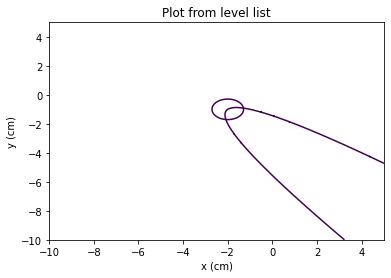

In [9]:
import matplotlib.pyplot as plt
def p(x,y):
  return 2*x**2 + 2*y**2+8*x+4*y+9

def q(x,y):
  return x**2+y**2+2*x*y+5*x+7*y+8

x = np.linspace(-10,5,1001)
y = np.linspace(-10,5,1001)
X,Y = np.meshgrid(x,y)
'''
p = np.zeros((1001,1001))
q = np.zeros((1001,1001))
for i in range(1001):
  for j in range(1001):
    pij = p(X[i,j],Y[i,j])
    qij = q(X[i,j],Y[i,j])
    if np.abs(pij)<0.01:
      p[i,j] = 1
    if np.abs(qij)<0.01:
      q[i,j] = 1
'''
P = 2*X**2 + 2*Y**2+8*X+4*Y+9
Q = X**2+Y**2+2*X*Y+5*X+7*Y+8
plt.figure()

levels = [0.0]
contour = plt.contour(X, Y, P, levels)
contour = plt.contour(X, Y, Q, levels)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()


b.

In [10]:
#import sympy as sp
#from sympy.solvers import solve
from sympy import *
x = symbols('x')
# eliminate y

res = Matrix([[2,4,2*x**2+8*x+9,0],[0,2,4,2*x**2+8*x+9],[1,2*x+7,x**2+5*x+8,0],[0,1,2*x+7,x**2+5*x+8]])
a = res.det()
ansx = [N(i) for i in solve(a, x)]
ansx = ansx[2:4]
print(ansx)
ansy = [-sqrt((-2*ansx[0]**2-7-8*ansx[0])/2)-1, sqrt((-2*ansx[1]**2-7-8*ansx[1])/2)-1]
print(ansy)

[-2.08405869450376, -1.29790731674634]
[-1.70209268325366, -0.915941305496236]


The two points are (-2.084,-0.298),(-1.298,-0.916).

c.

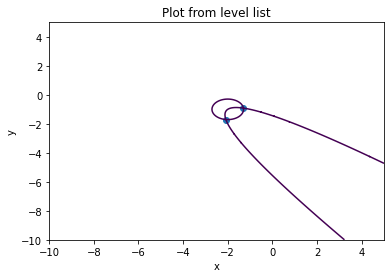

In [11]:
x = np.linspace(-10,5,1001)
y = np.linspace(-10,5,1001)
X,Y = np.meshgrid(x,y)
P = 2*X**2 + 2*Y**2+8*X+4*Y+9
Q = X**2+Y**2+2*X*Y+5*X+7*Y+8

plt.figure()

levels = [0.0]
contour = plt.contour(X, Y, P, levels)
contour = plt.contour(X, Y, Q, levels)
plt.scatter(ansx,ansy)

plt.title('Plot from level list')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Q8<br>
a.<br>
We want point $(x_p,y_p)$ within triangle region of $(x^{(i)},y^{(i)})$,$(x^{(j)},y^{(j)})$, $(x^{(k)},y^{(k)})$. Then for any line formed by arbitary two points $(x^{(i)},y^{(i)})$,$(x^{(j)},y^{(j)})$, we want both $(x^{(k)},y^{(k)})$ and $(x_p,y_p)$ on the same side of the line.<br>
Suppose the line with equation $ax+by+c=0$ goes through $(x^{(i)},y^{(i)})$,$(x^{(j)},y^{(j)})$, then lines $ax^{(k)}+by^{(k)}+d = 0$ and $ax_p+by_p+e = 0$ will have $d<c, e<c$ or $d>c, e>c$. Design the algorithm based on that.

In [12]:
from scipy.linalg import svd
def checkTriangle(x,y,xtest,ytest):
  
  for i in range(len(x)):
    matrix = np.array([[x[i],y[i],0,0,1],[x[(i+1)%len(x)],y[(i+1)%len(x)],0,0,1],[x[(i+2)%len(x)],y[(i+2)%len(x)],1,0,1],[xtest,ytest,0,1,1]])
    v = np.array([0,0,0,0])
    u, s, vh = svd(matrix)
    print(vh[-1,:])
    count = 0
    if(vh[-1,2]*vh[-1,3]>0.000001):
      count+=1
      print("test "+str(i)+" pass")
  return (count==3)
x = [0,1,3]
y = [6,6,9]
xtest = 1
ytest = 6.5
print(checkTriangle(x,y,xtest,ytest))

[-2.22044605e-16 -1.47042924e-01  4.41128773e-01  7.35214622e-02
  8.82257547e-01]
test 0 pass
[ 0.2941742  -0.19611614  0.2941742   0.09805807  0.88252261]
test 1 pass
[ 0.15961738 -0.15961738 -0.15961738 -0.07980869  0.95770426]
test 2 pass
False


b.<br>

In [40]:
import matplotlib.pyplot as plt
def checkFire(m,b,fire,r):
  u, s, vh = svd(m)
  nullv = vh[-1,:]
  u, s, vh = svd(m,full_matrices=False)
  for i,item in enumerate(s): # get the inverse of s
    if abs(item) < 0.0001:
      s[i] = 0
    else:
      s[i] = 1.0/item
  x = np.dot(np.transpose(vh),np.dot(np.diag(s),np.dot(np.transpose(u),b)))
  
def selectPath(start, fire, r):
  a = np.loadtxt('paths.txt')
  a = np.array(a).reshape((-1,2,a.shape[1]))
  bipath = [[],[]]
  for i in range(a.shape[0]):
    xdis = [np.abs(fire[1]-xa) for xa in a[i,1,:]]
    if(fire[0]-a[i,0,np.argmin(xdis)]<0):
      bipath[0].append(i) # fire on the right
    else:
      bipath[1].append(i)
      '''
  plt.figure()
  for i in bipath[0]:
    plt.plot(a[i,0,:],a[i,1,:])

  plt.title('Plot from level list')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  '''
  for o in range(2):
    for i in range(len(bipath[o])):
      for j in range(i+1,len(bipath[o])):
        for k in range(j+1,len(bipath[o])):
          x = [a[bipath[o][i],0,0],a[bipath[o][j],0,0],a[bipath[o][k],0,0]]
          y = [a[bipath[o][i],1,0],a[bipath[o][j],1,0],a[bipath[o][k],1,0]]
          if checkTriangle(x,y,start[0],start[1]):
            m = np.vstack([np.array(x),np.array(y),np.array([1,1,1])])
            b = np.array([start[0],start[1],1])
            u, s, vh = svd(m)
            if np.min(np.abs(s))==0:
              continue
            else:
              weights = np.dot(np.transpose(vh),np.dot(np.diag(1/s),np.dot(np.transpose(u),b)))
              oldpathx = np.array([a[bipath[o][i],0,:],a[bipath[o][j],0,:],a[bipath[o][k],0,:]])
              oldpathy = np.array([a[bipath[o][i],1,:],a[bipath[o][j],1,:],a[bipath[o][k],1,:]])
              newpath = np.vstack(np.dot(weights,oldpathx),np.dot(weights,oldpathy))
              return newpath
  

newpath = selectPath([0.8,1.8],[5,5],1.5)

OSError: ignored

In [14]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(a.shape[0]):
  plt.plot(a[i,0,:],a[i,1,:])

plt.title('Plot from level list')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


NameError: ignored

<Figure size 432x288 with 0 Axes>